## Model Fitting

This notebook fits various ML models and compares results to build a robust solution. Steps I took included...

- Fit various models on scaled and unscaled data including Logistic Regression, kNeighbors, and RandomForestClassifier
- Calculating accuracy score of each model on training and testing data.
- Calculating precision, recall, and F1 score on test data 
- Plotting confusion matrix using test data
- Hyperparameter tuning of the best models using gridsearch
- Stacked the best performing models- this produces a more robust performance than using one model alone  - this achieved a classification rate of 80%


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.rows",None)
pd.set_option("display.max.columns",None)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [8]:
#read in dataframes

x_train= pd.read_csv('./data/x_train.csv')
x_test= pd.read_csv('./data/x_test.csv')
y_train= pd.read_csv('./data/y_train.csv')
y_test= pd.read_csv('./data/y_test.csv')

x_train1=pd.read_csv('./data/x_train1.csv')
x_test1=pd.read_csv('./data/x_test1.csv')
y_train1=pd.read_csv('./data/y_train1.csv')
y_test1=pd.read_csv('./data/y_test1.csv')

Building models for scaled data 
--

In [9]:
training_score = []
testing_score = []

In [10]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Logistic regression 

Accuracy_Score of LogisticRegression() model on Training Data is: 77.85447224618925
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.11328349626221

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.7569892473118279
Recall Score of LogisticRegression() model is: 0.8036529680365296
F1 Score of LogisticRegression() model is: 0.7796234772978959

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


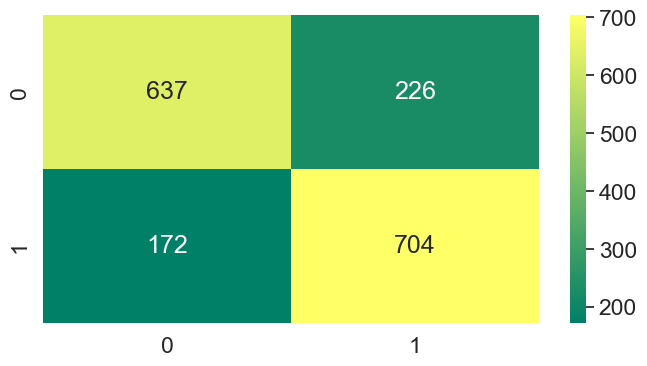

In [11]:
model_prediction(LogisticRegression())

KNeighbors Classifier


Accuracy_Score of KNeighborsClassifier() model on Training Data is: 83.08886971527178
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.50316273720529

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7710843373493976
Recall Score of KNeighborsClassifier() model is: 0.730593607305936
F1 Score of KNeighborsClassifier() model is: 0.7502930832356389

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


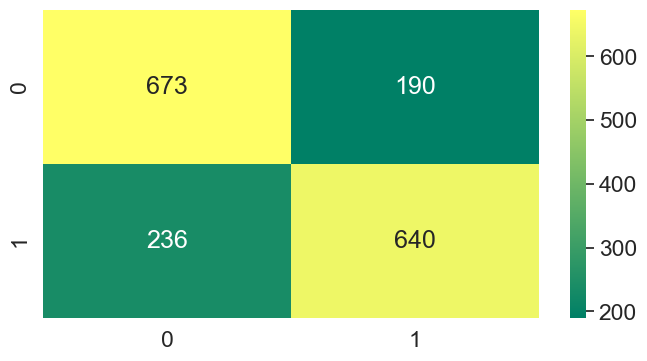

In [12]:
model_prediction(KNeighborsClassifier())

Support-vector-classifier model

Accuracy_Score of SVC() model on Training Data is: 81.8234109864826
Accuracy_Score of SVC() model on Testing Data is: 79.700977573318

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.7995418098510882
Recall Score of SVC() model is: 0.7968036529680366
F1 Score of SVC() model is: 0.7981703830760435

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


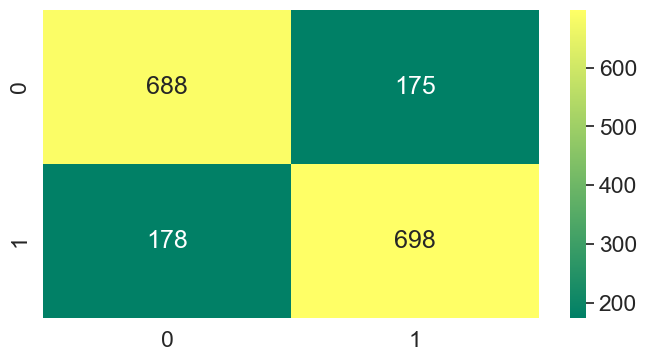

In [13]:
model_prediction(SVC())

Naive-Bayes model

Accuracy_Score of GaussianNB() model on Training Data is: 73.94305435720449
Accuracy_Score of GaussianNB() model on Testing Data is: 73.3755031627372

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7779273216689099
Recall Score of GaussianNB() model is: 0.6598173515981736
F1 Score of GaussianNB() model is: 0.7140210006176653

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


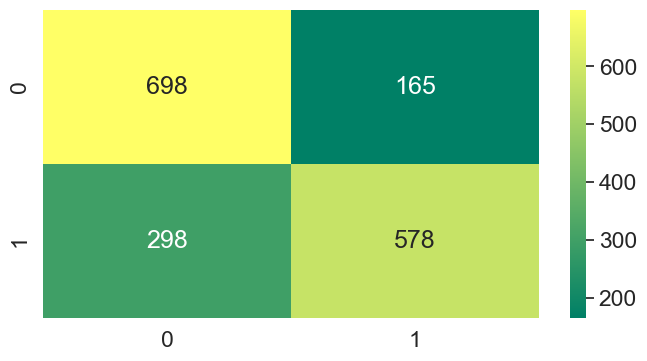

In [14]:
model_prediction(GaussianNB())

Model building for un-scaled data 
--

In [15]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Decision-tree classifier 

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 73.72052903967797

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7367231638418079
Recall Score of DecisionTreeClassifier() model is: 0.7442922374429224
F1 Score of DecisionTreeClassifier() model is: 0.740488358886996

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


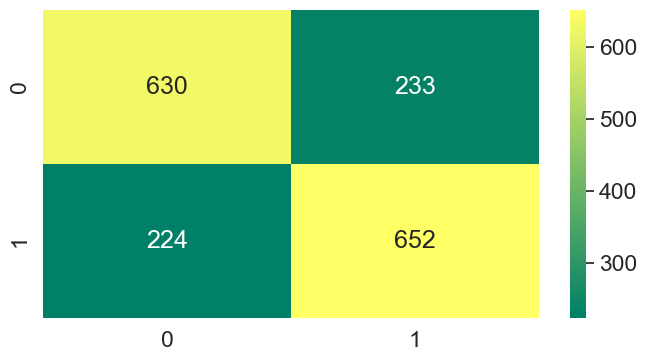

In [16]:
model_prediction(DecisionTreeClassifier())

Random forest classifier 

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 80.27602070155262

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8302354399008675
Recall Score of RandomForestClassifier() model is: 0.7648401826484018
F1 Score of RandomForestClassifier() model is: 0.7961972667855021

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


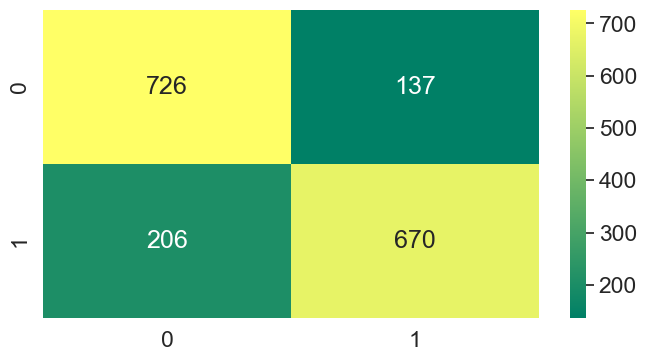

In [17]:
model_prediction(RandomForestClassifier())

Ada-boost classifier

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 78.5878631003739
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 77.97584818861415

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7723756906077348
Recall Score of AdaBoostClassifier() model is: 0.797945205479452
F1 Score of AdaBoostClassifier() model is: 0.7849522740033689

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


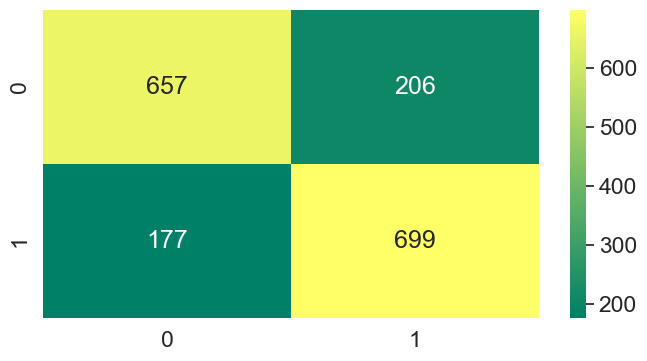

In [18]:
model_prediction(AdaBoostClassifier())

Gradient boosting classifier

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.053494391717
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 79.29844738355378

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7721518987341772
Recall Score of GradientBoostingClassifier() model is: 0.8356164383561644
F1 Score of GradientBoostingClassifier() model is: 0.8026315789473685

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


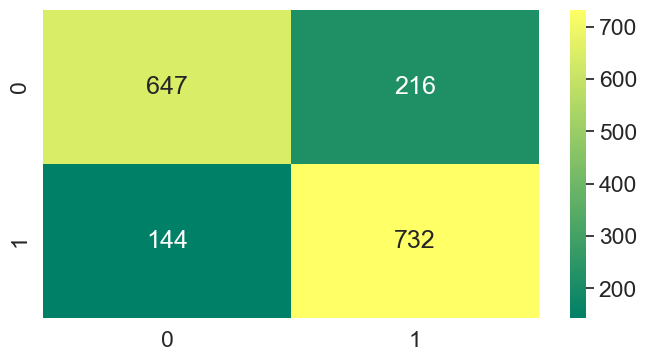

In [19]:
model_prediction(GradientBoostingClassifier())

LGMB Classifier-- errror


XGB Classifier model

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) model on Training Data is: 92.52228932988208
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None,

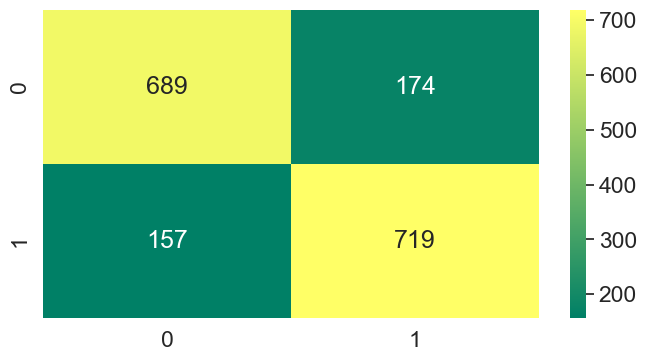

In [20]:
model_prediction(XGBClassifier())

Cat boost classifier

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x0000019C74D149D0> model on Training Data is: 87.331032499281
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x0000019C74D149D0> model on Testing Data is: 81.36860264519838

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x0000019C74D149D0> model is: 0.8032967032967033
Recall Score of <catboost.core.CatBoostClassifier object at 0x0000019C74D149D0> model is: 0.8344748858447488
F1 Score of <catboost.core.CatBoostClassifier object at 0x0000019C74D149D0> model is: 0.8185890257558791

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x0000019C74D149D0> model is:


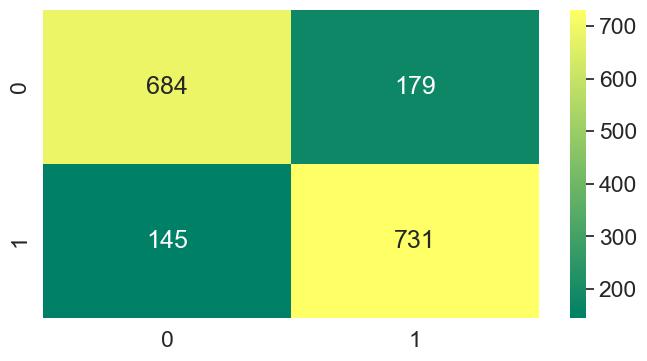

In [21]:
model_prediction(CatBoostClassifier(verbose=False))

All model performance comparison
--

In [22]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","XGBoost","CatBoost"]

In [23]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

df

,Algorithms,Training Score,Testing Score
0,Logistic Regression,77.854472,77.113283
1,KNN,83.088870,75.503163
2,SVM,81.823411,79.700978
3,Naive Bayes,73.943054,73.375503
4,Decision Tree,98.533218,73.720529
5,Random Forest,98.533218,80.276021
6,Ada Boost,78.587863,77.975848
7,Gradient Boost,82.053494,79.298447
8,XGBoost,92.522289,80.966072
9,CatBoost,87.331032,81.368603


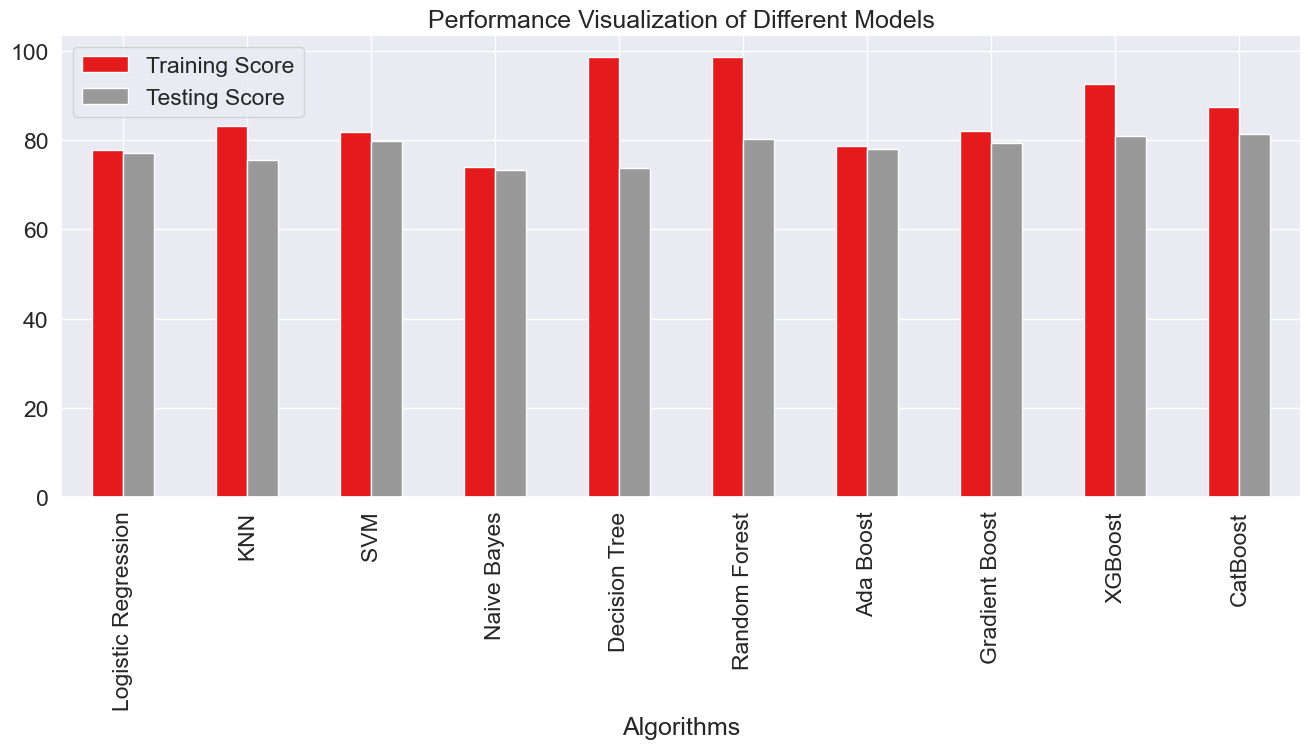

In [24]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

Hyper parameter tuning
--

In [25]:
#catboost

model2 = CatBoostClassifier(verbose=False)
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}


In [26]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)


In [ ]:
grid_search2.fit(x_train,y_train)


In [ ]:
grid_search2.best_score_

0.8055803753833741

In [ ]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 40, 'learning_rate': 0.3, 'random_state': 0}

In [ ]:
model2 = CatBoostClassifier(**best_parameters2,verbose=False)
model2.fit(x_train,y_train)

In [ ]:
x_test_pred2 = model2.predict(x_test)
accuracy_score(y_test,x_test_pred2)

0.7981598619896493

XGB tuning
--

In [ ]:
model3 = XGBClassifier()
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)
grid_search3.fit(x_train,y_train)
grid_search3.best_score_
best_parameters3 = grid_search3.best_params_
best_parameters3
model3 = XGBClassifier(**best_parameters3)
model3.fit(x_train,y_train)
x_test_pred3 = model3.predict(x_test)
accuracy_score(y_test,x_test_pred3)


0.8113858539390454

Random forest tuning
--

In [ ]:
model4 = RandomForestClassifier()
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}
    
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)
grid_search4.fit(x_train,y_train.values.ravel())
grid_search4.best_score_
best_parameters4 = grid_search4.best_params_
best_parameters4
model4 = RandomForestClassifier(**best_parameters4)
model4.fit(x_train,y_train)
x_test_pred4 = model4.predict(x_test)
accuracy_score(y_test,x_test_pred4)

0.8021851638872916

stacking classifier model
--

In [ ]:
stacking_model = StackingClassifier(estimators=[ 
                                                ('CAT Boost', model2),
                                                ("XGBoost", model3),
                                                ('RF', model4)])

In [ ]:
stacking_model.fit(x_train, y_train)

StackingClassifier(estimators=[('CAT Boost',
                                <catboost.core.CatBoostClassifier object at 0x0000025E275C43D0>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=Non...
                                              learning_rate=0.1, max_bin=None,
                                        

In [ ]:
x_train_pred5 = stacking_model.predict(x_train)
x_test_pred5 = stacking_model.predict(x_test)
print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,x_train_pred5)*100)

Stacking Model accuracy on Training Data is: 87.93500143802129


In [ ]:
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred5)*100)

Stacking Model accuracy on Testing Data is: 80.56354226566992
